# COVID-19 vaccine sentiment analysis

ECE30007-01 Introduction to AI Project.  
Team 2
*   21700589 이찬효
*   21800499 이경준
*   21900411 심가현
*   21900632 장지형




In [1]:
def my_path():
    path = "/content/drive/MyDrive/"
    return path

#1.   Import google drive




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Import package
*   pandas
*   numpy
*   nltk
*   re
*   unicodedata

#3. Read our data file to pandas data frame

In [3]:
import pandas as pd
import numpy as np

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TreebankWordTokenizer

import re
import unicodedata

df = pd.read_csv(my_path() + "vaccination_all_tweets.csv")

#4. data cleaning using nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [6]:
def text_cleaning(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [7]:
%%time
df.user_name = df.user_name.apply(lambda x: text_cleaning(x))
df = df.drop_duplicates(['user_created'], ignore_index=False)

CPU times: user 739 ms, sys: 386 µs, total: 740 ms
Wall time: 754 ms


In [8]:
df.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,rachel roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,albert fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42283 entries, 0 to 78314
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                42283 non-null  int64 
 1   user_name         42283 non-null  object
 2   user_location     32896 non-null  object
 3   user_description  38813 non-null  object
 4   user_created      42283 non-null  object
 5   user_followers    42283 non-null  int64 
 6   user_friends      42283 non-null  int64 
 7   user_favourites   42283 non-null  int64 
 8   user_verified     42283 non-null  bool  
 9   date              42283 non-null  object
 10  text              42283 non-null  object
 11  hashtags          33196 non-null  object
 12  source            42273 non-null  object
 13  retweets          42283 non-null  int64 
 14  favorites         42283 non-null  int64 
 15  is_retweet        42283 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 4.9+ MB


In [10]:
df.isnull().sum()

id                     0
user_name              0
user_location       9387
user_description    3470
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            9087
source                10
retweets               0
favorites              0
is_retweet             0
dtype: int64

#5. pre-processing user location

In [11]:
df = df.dropna(subset=['user_location'])

In [12]:
df.isnull().sum()

id                     0
user_name              0
user_location          0
user_description    1574
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            7004
source                 4
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [13]:
usr_loc = (df.loc[:, ['user_location']])

In [14]:
print(type(usr_loc), '\n', usr_loc)

<class 'pandas.core.frame.DataFrame'> 
                    user_location
0      La Crescenta-Montrose, CA
1              San Francisco, CA
2                       Your Bed
3         Vancouver, BC - Canada
5            Birmingham, England
...                          ...
78306                  Bangalore
78307                    kolkata
78310     Rishikesh, Uttaranchal
78312                    India🇮🇳
78314                  New Delhi

[32896 rows x 1 columns]


In [15]:
type(usr_loc.iloc[:, 0])

pandas.core.series.Series

In [16]:
unique_locations = (usr_loc.iloc[:, 0]).unique()
locations = (usr_loc.iloc[:, 0])
print(len(unique_locations), '\n', unique_locations)
print(len(locations), '\n', locations)

13831 
 ['La Crescenta-Montrose, CA' 'San Francisco, CA' 'Your Bed' ...
 'Goregoan, Mumbai' 'White Uprising' 'Rishikesh, Uttaranchal']
32896 
 0        La Crescenta-Montrose, CA
1                San Francisco, CA
2                         Your Bed
3           Vancouver, BC - Canada
5              Birmingham, England
                   ...            
78306                    Bangalore
78307                      kolkata
78310       Rishikesh, Uttaranchal
78312                      India🇮🇳
78314                    New Delhi
Name: user_location, Length: 32896, dtype: object


**This data file contains information about countries and cities around the world.**

In [17]:
location_df = pd.read_csv(my_path() + "worldcities.csv")

In [18]:
location_df.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [19]:
unique_countires = (location_df.loc[:, ['country']]).iloc[:,0].unique()
unique_cities = (location_df.loc[:, ['city']]).iloc[:,0].unique()
# print(len(unique_countires), '\n', unique_countires)
# print(len(unique_cities), '\n', unique_cities)

In [20]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [21]:
city2country = {}
for index, row in location_df.iterrows():
    city2country[normalizeString(row['city_ascii'])] = normalizeString(row['country'])

In [22]:
df['user_location'] = df['user_location'].apply(normalizeString)

In [23]:
def to_country(x) :
    temp_loc = x.split()
    for city in city2country.keys():
        off_city = city.split()
        flag = 1
        for i in range(0, len(off_city)):
            token = off_city[i]
            if token not in temp_loc:
                flag = 0
                break
        if flag == 1:
            return city2country[city]
    return ''


In [24]:
%%time
df['user_location']=df['user_location'].apply(to_country)

CPU times: user 3min 32s, sys: 425 ms, total: 3min 33s
Wall time: 3min 33s


In [25]:
usr_loc = (df.loc[:, ['user_location']])
usr_loc = usr_loc.iloc[:, 0]

loc_value_count = usr_loc.value_counts()
pd.set_option('display.max_rows', None)
print(loc_value_count)



                                    12491
united states                       11383
india                                2870
united kingdom                        761
canada                                685
chile                                 513
turkey                                417
pakistan                              284
philippines                           220
kenya                                 206
cuba                                  205
australia                             195
mexico                                183
united arab emirates                  176
puerto rico                           155
venezuela                             150
belgium                               100
singapore                              98
hong kong                              94
china                                  92
brazil                                 89
germany                                85
zimbabwe                               80
south africa                      

In [26]:
!pip install langdetect

     |████████████████████████████████| 983kB 3.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=0d220041905c707e18549bd659e17de39e722f39120e478094b81d53a71a7662
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [27]:
non_eng_idx = df[(df['user_location']) != 'united states'].index
df = df.drop(non_eng_idx)

In [28]:
usr_loc = (df.loc[:, ['user_location']])
usr_loc = usr_loc.iloc[:, 0]

loc_value_count = usr_loc.value_counts()
pd.set_option('display.max_rows', None)
print(loc_value_count)

united states    11383
Name: user_location, dtype: int64


In [29]:
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords

In [30]:
text_train_df = df
text_train = []

for i in text_train_df['text']:
  text_train.append(i)

1. remove HTML

In [31]:
# remove HTML
def remove_html(text_data):
    """
    remove_html takes raw text and removes html tags from the text.
    """
    soup = BeautifulSoup(text_data, 'lxml')
    return soup.get_text()

# update list
for i in range(len(text_train)):
  text_train[i] = remove_html("".join(text_train[i]))
  # print(text_train[i])

# update dataframe 'text'
text_train_df['text'] = text_train
text_train_df['text'].head(100)

0      Same folks said daikon paste could treat a cyt...
3      Facts are immutable, Senator, even when you're...
5      Does anyone have any useful advice/guidance fo...
15     Trump announces #vaccine rollout 'in less than...
18     .@Pfizer will rake in billions from its expens...
21     Anyone wondering why day after #PfizerBioNTech...
25     No.1 of 2 done.\n\n#ThankYouNHS @NHSuk @MHRAgo...
27     ⁦@AvgerinosMoscow⁩ #PfizerBioNTech #FDA approv...
28     Interesting and very detailed article showing ...
30     @ZubyMusic 6 deaths so far. \nIt's only death,...
31     @sbnumb3 @nytimes Please don’t spread fake new...
34     Vaccine!! Anyone?? #covid #Pfizervaccine #Pfiz...
48     As @EMA_News gets set to approve #PfizerBioNTe...
53     The first COVID-19 vaccine doses have arrived ...
54     #Iran has told the World Health Organization i...
56     Such a great feeling. A big thank you to all t...
58     Getting my first dose of the #PfizerBioNTech #...
59     Will you be taking the C

2.  Cleaning - Remove punctuation

In [32]:
# remove punctuation
def remove_punctuation(text):
    sent = []
    for t in text.split(' '):
        no_punct = "".join([c for c in t if c not in string.punctuation])
        sent.append(no_punct)
    
    sentence = " ".join(s for s in sent)
    return sentence

# update list
for i in range(len(text_train)):
  text_train[i] = remove_punctuation("".join(text_train[i]))
  # print(text_train[i])

# update dictionary
text_train_df['text'] = text_train
text_train_df['text'].head(100)

0      Same folks said daikon paste could treat a cyt...
3      Facts are immutable Senator even when youre no...
5      Does anyone have any useful adviceguidance for...
15     Trump announces vaccine rollout in less than 2...
18     Pfizer will rake in billions from its expensiv...
21     Anyone wondering why day after PfizerBioNTech ...
25     No1 of 2 done\n\nThankYouNHS NHSuk MHRAgovuk a...
27     ⁦AvgerinosMoscow⁩ PfizerBioNTech FDA approval ...
28     Interesting and very detailed article showing ...
30     ZubyMusic 6 deaths so far \nIts only death not...
31     sbnumb3 nytimes Please don’t spread fake news ...
34     Vaccine Anyone covid Pfizervaccine PfizerBioNT...
48     As EMANews gets set to approve PfizerBioNTech ...
53     The first COVID19 vaccine doses have arrived i...
54     Iran has told the World Health Organization it...
56     Such a great feeling A big thank you to all th...
58     Getting my first dose of the PfizerBioNTech Co...
59     Will you be taking the C

2-3. Remove emojis

In [33]:
# remove emojis
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

# update list
for i in range(len(text_train)):
  text_train[i] = remove_emojis(text_train[i])

# update dataframe
text_train_df['text'] = text_train
text_train_df['text'].head(100)

0      Same folks said daikon paste could treat a cyt...
3      Facts are immutable Senator even when youre no...
5      Does anyone have any useful adviceguidance for...
15     Trump announces vaccine rollout in less than 2...
18     Pfizer will rake in billions from its expensiv...
21     Anyone wondering why day after PfizerBioNTech ...
25     No1 of 2 done\n\nThankYouNHS NHSuk MHRAgovuk a...
27     ⁦AvgerinosMoscow⁩ PfizerBioNTech FDA approval ...
28     Interesting and very detailed article showing ...
30     ZubyMusic 6 deaths so far \nIts only death not...
31     sbnumb3 nytimes Please don’t spread fake news ...
34     Vaccine Anyone covid Pfizervaccine PfizerBioNT...
48     As EMANews gets set to approve PfizerBioNTech ...
53     The first COVID19 vaccine doses have arrived i...
54     Iran has told the World Health Organization it...
56     Such a great feeling A big thank you to all th...
58     Getting my first dose of the PfizerBioNTech Co...
59     Will you be taking the C

2-4. Make lower case

In [34]:
# change to lower case
# update list
for i in range(len(text_train)):
  text_train[i] = text_train[i].lower()
  # print(text_train[i])

# update dataframe
text_train_df['text'] = text_train
text_train_df['text']

0        same folks said daikon paste could treat a cyt...
3        facts are immutable senator even when youre no...
5        does anyone have any useful adviceguidance for...
15       trump announces vaccine rollout in less than 2...
18       pfizer will rake in billions from its expensiv...
21       anyone wondering why day after pfizerbiontech ...
25       no1 of 2 done\n\nthankyounhs nhsuk mhragovuk a...
27       ⁦avgerinosmoscow⁩ pfizerbiontech fda approval ...
28       interesting and very detailed article showing ...
30       zubymusic 6 deaths so far \nits only death not...
31       sbnumb3 nytimes please don’t spread fake news ...
34       vaccine anyone covid pfizervaccine pfizerbiont...
48       as emanews gets set to approve pfizerbiontech ...
53       the first covid19 vaccine doses have arrived i...
54       iran has told the world health organization it...
56       such a great feeling a big thank you to all th...
58       getting my first dose of the pfizerbiontech co.

In [35]:
from langdetect import detect

print(len(text_train_df))

count = 0

for i in text_train_df['text']:
  result = detect(i)
  if 'en' not in result:
    text_train_df_idx = text_train_df[text_train_df['text'] == i].index
    text_train_df = text_train_df.drop(text_train_df_idx)
    
    count += 1

print(count)
print(len(text_train_df))

11383
447
10936


4. Remove stop words

In [36]:
text_train_df.text = text_train_df.text.apply(lambda x: text_cleaning(x))

In [37]:
text_train_df.text.head(10)

0     folks said daikon paste could treat cytokine s...
3     facts immutable senator even youre ethically s...
5     anyone useful adviceguidance whether covid vac...
15    trump announces vaccine rollout less 24 hours ...
18    pfizer rake billions expensive covidvaccine al...
21    anyone wondering day pfizerbiontech approval u...
25    no1 2 done thankyounhs nhsuk mhragovuk pfizerb...
28    interesting detailed article showing well test...
30    zubymusic 6 deaths far death nothing worry cov...
31    sbnumb3 nytimes please spread fake news eviden...
Name: text, dtype: object

In [38]:
df = text_train_df
print(len(df))

10936


#6. Import setiment analyser





In [39]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer ()

     |████████████████████████████████| 133kB 2.8MB/s 


In [40]:
def sentiment_scores(text):
  score = analyser.polarity_scores(text)
  lb = score['compound']
  if lb >= 0.05:
    return 1
  elif (lb > -0.05) and (LB < 0.05):
    return 0
  else:
    return -1

In [41]:
import seaborn as sns

def plot_tweets(lst, title='Tweets Sentiment'):
  sents = []
  for tw in lst:
    try:
      st = sentiment_scores(tw)
      sents.append(st)
    except:
      sents.append(0)
  ax = sns.distplot(sents, norm_hist = True, kde=False, bins=3)
  ax.set (xlabel='Negative              Neutral              Positive',
          ylabel='#Tweets',
          title="Tweets of @"+title)
  return sents

In [42]:
df.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,rachel roh,united states,Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],Twitter for Android,0,0,False
3,1337855739918835717,charles adler,united states,"Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,Twitter Web App,446,2129,False
5,1337852648389832708,dee,united states,"Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,anyone useful adviceguidance whether covid vac...,NaN,Twitter for iPhone,0,0,False


In [43]:
df['text']

0        folks said daikon paste could treat cytokine s...
3        facts immutable senator even youre ethically s...
5        anyone useful adviceguidance whether covid vac...
15       trump announces vaccine rollout less 24 hours ...
18       pfizer rake billions expensive covidvaccine al...
21       anyone wondering day pfizerbiontech approval u...
25       no1 2 done thankyounhs nhsuk mhragovuk pfizerb...
28       interesting detailed article showing well test...
30       zubymusic 6 deaths far death nothing worry cov...
31       sbnumb3 nytimes please spread fake news eviden...
34       vaccine anyone covid pfizervaccine pfizerbiont...
48       emanews gets set approve pfizerbiontech vaccin...
53       first covid19 vaccine doses arrived oregon wat...
54       iran told world health organization intend imp...
56       great feeling big thank healthcare professiona...
58       getting first dose pfizerbiontech covidvaccine...
59       taking covid19 vaccine available covid19 pfize.

**Visualization all tweet from USA related to COVID-19 vaccine**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


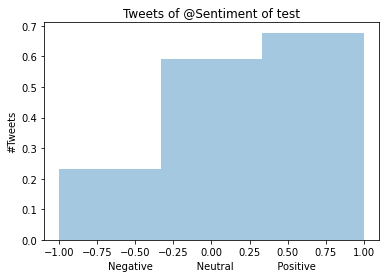

In [44]:
scores_test = plot_tweets(df['text'], 'Sentiment of ' + 'test')

#7. Split data by each month

In [45]:
import datetime
def to_month(x) :
    datetime_obj = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return datetime_obj.month
df['date']=df['date'].apply(to_month)
date_series = (df.loc[:, ['date']])
date_series = date_series.iloc[:, 0]

date_series_count = date_series.value_counts()
pd.set_option('display.max_rows', None)
print(date_series_count)

3     4011
4     3456
2     1618
5      854
1      609
12     388
Name: date, dtype: int64


In [46]:
df_12_idx = df[(df['date']) != 12].index
df_12 = df.drop(df_12_idx)
# df_12 = df_12.loc[:, ['text']]

df_1_idx = df[(df['date']) != 1].index
df_1 = df.drop(df_1_idx)
# df_1 = df_1.loc[:, ['text']]

df_2_idx = df[(df['date']) != 2].index
df_2 = df.drop(df_2_idx)
# df_2 = df_2.loc[:, ['text']]

df_3_idx = df[(df['date']) != 3].index
df_3 = df.drop(df_3_idx)
# df_3 = df_3loc[:, ['text']]

df_4_idx = df[(df['date']) != 4].index
df_4 = df.drop(df_4_idx)
# df_4 = df_4.loc[:, ['text']]

df_5_idx = df[(df['date']) != 5].index
df_5 = df.drop(df_5_idx)
# df_5 = df_5.loc[:, ['text']]

**Visualization tweet from USA related to COVID-19 vaccine by each month**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


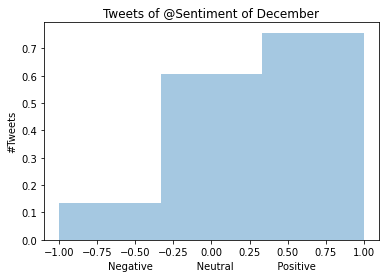

In [47]:
scores_test = plot_tweets(df_12['text'], 'Sentiment of ' + 'December')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


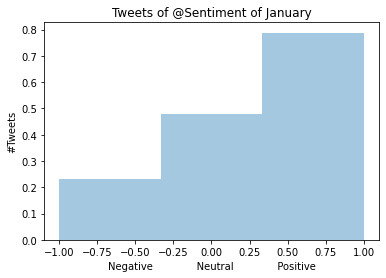

In [48]:
scores_test = plot_tweets(df_1['text'], 'Sentiment of ' + 'January')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


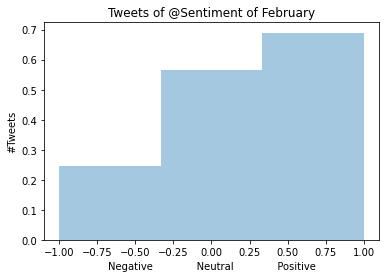

In [49]:
scores_test = plot_tweets(df_2['text'], 'Sentiment of ' + 'February')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


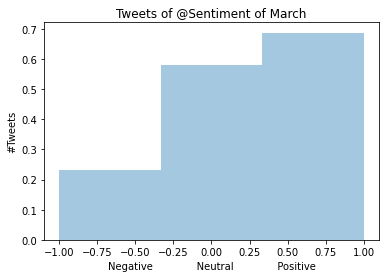

In [50]:
scores_test = plot_tweets(df_3['text'], 'Sentiment of ' + 'March')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


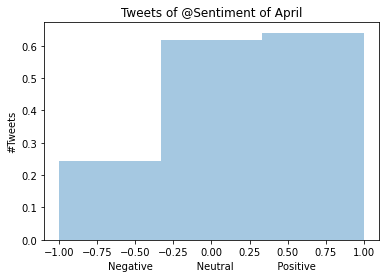

In [51]:
scores_test = plot_tweets(df_4['text'], 'Sentiment of ' + 'April')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


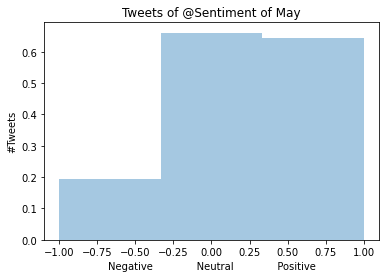

In [52]:
scores_test = plot_tweets(df_5['text'], 'Sentiment of ' + 'May')